# Capstone 1: Data Wrangling

The data for this capstone comes from multiple different sources. Each source has a different way for delivering data, and the data cleaning/wrangling procedures for each are also different.

There are several types of data sources considered here:

1) Historical local area unemployment data: This data was obtained from the Bureau of Labor Statistics (BLS) website. Obtaining the data for each county, over many years, is however not trivial. One must use the BLS Public Data API, the code for which is given later in this notebook. One must also register on the BLS website, where they give you a API key so that large data queries can be handled. The data returned by this API was also very clean, with no missing/Nan values.

2) Historical oil price data: This data was simply downloaded as a csv file from the Energy Information Administration (EIA) website. They aggregate the oil price by day, and there are some missing values in this data which need to be taken care of.

3) Oil and gas production data: We take the historical production for three states which currently produce most of US oil and gas - Texas, North Dakota and Oklahoma. The data is reported every month, by well. There are thousands of these oil wells, which are often abandoned for various reasons, including depletion of the oil field. In addition, there is a well index file associated with the data, which reports its latitude and longitude and the state/county in which it is located. For both North Dakota and Oklahoma, the data was obtained from Enigma's curated oil and gas data collection. Enigma obtained the data from each state's regulatory body for oil and gas. For Texas, the data on Enigma's website was incomplete (they report only the last 12 months). The full historical data was obtained as a raw data dump by emailing Enigma's helpline. They purchase the raw data from the Railroad Commission, and were happy to supply it to me. Thankfully, the oil and gas production data is well maintained for all the states, with no missing values.

4) Historical local area workforce: this is the absolute number of people in the workforce in a given county, as opposed to the percentage of unemployed people. This data is also available from the BLS, with the appropriate API

5) Macro-economic indicators: Since we are comparing local area unemployment with oil price, we should also take into account that some unemployment changes are due to the macro-economy, not just the oil price. For example, we see sharp increases in unemployment across the country in 2008 accompanied by sharp drops in oil price. This change is therefore not just due to oil price, but also due to wider economic recession. This data helps to separate out these effects.

Each of the sources have been handled in their own Jupyter notebooks, here I just put them together into a single dataframe for analysis.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir

## Unemployment data

In [46]:
tx_unemp = pd.read_csv('./UnemploymentData/tx_unemployment.csv')
nd_unemp = pd.read_csv('./UnemploymentData/nd_unemployment.csv')
wy_unemp = pd.read_csv('./UnemploymentData/wy_unemployment.csv')

In [47]:
tx_unemp.head()

,Date,"Anderson County, TX","Andrews County, TX","Angelina County, TX","Aransas County, TX","Archer County, TX","Armstrong County, TX","Atascosa County, TX","Austin County, TX","Bailey County, TX",...,"Willacy County, TX","Williamson County, TX","Wilson County, TX","Winkler County, TX","Wise County, TX","Wood County, TX","Yoakum County, TX","Young County, TX","Zapata County, TX","Zavala County, TX"
0,01/1990,7.2,4.4,6.5,4.7,2.6,3.8,7.4,3.6,2.8,...,18.9,4.5,4.7,5.2,4.3,6.1,3.1,3.5,14.6,22.6
1,01/1991,6.8,3.2,7.2,4.7,2.6,4.6,7.2,3.2,4.2,...,20.3,3.3,4.2,5.1,4.8,6.0,3.9,3.5,14.7,24.1
2,01/1992,9.7,8.0,8.0,6.1,4.7,5.1,9.0,5.2,5.8,...,22.5,3.3,5.6,8.7,6.9,8.2,4.6,6.9,18.9,30.5
3,01/1993,7.6,8.3,8.2,6.9,3.1,4.9,7.2,4.2,9.6,...,25.3,2.9,4.0,10.4,6.6,7.3,7.8,7.9,19.1,25.3
4,01/1994,6.6,6.2,7.2,7.4,4.3,5.2,6.0,4.4,6.9,...,28.1,2.6,3.7,9.5,5.2,6.9,5.5,9.3,17.5,24.8


In [48]:
nd_unemp.head()

,Date,"Adams County, ND","Barnes County, ND","Benson County, ND","Billings County, ND","Bottineau County, ND","Bowman County, ND","Burke County, ND","Burleigh County, ND","Cass County, ND",...,"Slope County, ND","Stark County, ND","Steele County, ND","Stutsman County, ND","Towner County, ND","Traill County, ND","Walsh County, ND","Ward County, ND","Wells County, ND","Williams County, ND"
0,01/1990,2.1,4.7,9.7,8.7,5.2,2.9,3.7,5.1,3.6,...,2.9,4.9,2.7,4.8,4.7,3.9,5.4,5.5,9.0,4.3
1,01/1991,3.4,5.2,9.0,6.3,5.6,2.6,4.1,4.8,3.4,...,3.5,5.7,1.5,4.7,4.6,3.3,5.3,5.1,9.9,3.9
2,01/1992,3.2,5.6,12.5,8.1,4.9,4.7,4.9,5.1,3.8,...,5.1,6.8,2.4,5.7,4.7,3.4,5.2,5.6,10.3,6.1
3,01/1993,2.2,6.3,15.7,6.1,5.5,5.1,3.8,5.1,3.6,...,3.3,5.1,2.5,5.2,3.6,3.4,5.3,6.0,10.4,5.5
4,01/1994,1.9,4.9,11.2,2.9,4.0,3.6,3.2,4.9,3.2,...,2.9,5.4,1.8,4.8,2.4,3.0,6.8,5.3,8.9,6.4


In [51]:
wy_unemp.head()

,Date,"Albany County, WY","Big Horn County, WY","Campbell County, WY","Carbon County, WY","Converse County, WY","Crook County, WY","Fremont County, WY","Goshen County, WY","Hot Springs County, WY",...,"Niobrara County, WY","Park County, WY","Platte County, WY","Sheridan County, WY","Sublette County, WY","Sweetwater County, WY","Teton County, WY","Uinta County, WY","Washakie County, WY","Weston County, WY"
0,01/1990,5.8,7.2,5.3,6.7,8.8,5.4,11.1,5.0,5.1,...,5.6,7.2,7.5,7.2,3.9,6.7,2.5,8.0,5.4,6.3
1,01/1991,4.2,7.8,5.7,8.0,8.0,4.0,9.3,4.2,5.3,...,6.2,6.3,8.1,8.3,4.2,7.6,3.0,8.3,4.7,7.5
2,01/1992,3.6,7.9,6.5,8.2,7.6,4.7,10.1,4.5,5.7,...,7.2,6.6,7.8,8.4,5.6,7.9,4.9,9.7,5.3,8.1
3,01/1993,3.5,7.3,6.5,7.9,6.5,4.1,8.5,4.5,6.6,...,4.8,5.7,7.1,5.9,3.8,7.4,2.7,8.4,7.3,5.8
4,01/1994,3.2,7.9,6.0,7.3,7.5,5.1,9.6,4.4,6.2,...,3.9,6.0,7.5,7.5,4.7,6.7,2.7,9.3,6.6,7.8


In [79]:
tx_laborForce = pd.read_csv('./UnemploymentData/tx_laborForce.csv')
wy_laborForce = pd.read_csv('./UnemploymentData/wy_laborForce.csv')
nd_laborForce = pd.read_csv('./UnemploymentData/nd_laborForce.csv')

## Oil Price data

In [33]:
oil_prices = pd.read_csv('./OilPrices/oil_price_by_month.csv')

In [34]:
oil_prices.head()

,Date,WTI
0,01/1986,22.925455
1,02/1986,15.454737
2,03/1986,12.612500
3,04/1986,12.843636
4,05/1986,15.377619


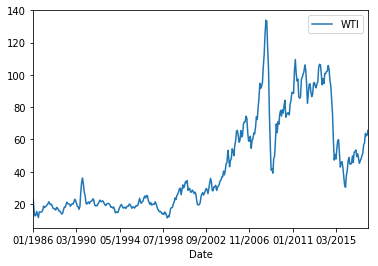

In [35]:
# See how the data looks
oil_prices.plot('Date','WTI')
plt.show()

## Macroeconomic indicators: S&P 500 historical data

In [36]:
sp500 = pd.read_csv('./EconomicIndices/sp500_month.csv')

In [37]:
sp500.head()

,Date,SP500
0,01/1986,208.194091
1,02/1986,219.365263
2,03/1986,232.327000
3,04/1986,237.967727
4,05/1986,238.459048


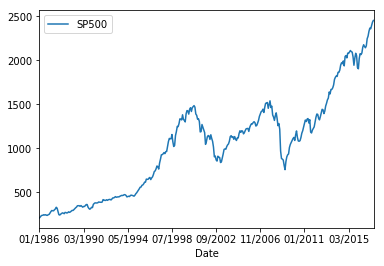

In [38]:
sp500.plot('Date','SP500')
plt.show()

## Oil and Gas production data

In [39]:
tx_oil_prod = pd.read_csv('./OilGasProduction/Texas/TexasOilProdCounty.csv')
nd_oil_prod = pd.read_csv('./OilGasProduction/NorthDakota/NDOilProdCounty.csv')
wy_oil_prod = pd.read_csv('./OilGasProduction/Wyoming/WYOilProdCounty.csv')

In [40]:
tx_oil_prod.head()

,Date,"Anderson County, TX","Andrews County, TX","Angelina County, TX","Aransas County, TX","Archer County, TX","Armstrong County, TX","Atascosa County, TX","Austin County, TX","Bandera County, TX",...,"Willacy County, TX","Williamson County, TX","Wilson County, TX","Winkler County, TX","Wise County, TX","Wood County, TX","Yoakum County, TX","Young County, TX","Zapata County, TX","Zavala County, TX"
0,01/1993,121640.0,2866720.0,132.0,30998.0,229457.0,0.0,74280.0,48319.0,0.0,...,72844.0,825.0,133441.0,414290.0,82683.0,848809.0,2728824.0,212978.0,7072.0,256497.0
1,01/1994,110684.0,2846724.0,148.0,33803.0,214768.0,0.0,66752.0,45153.0,0.0,...,68147.0,1423.0,90654.0,391482.0,86178.0,804362.0,2643341.0,188740.0,5587.0,146641.0
2,01/1995,111589.0,2688326.0,133.0,28209.0,187377.0,0.0,60447.0,31324.0,0.0,...,57598.0,917.0,76739.0,398144.0,78929.0,707875.0,2576306.0,186605.0,5426.0,92445.0
3,01/1996,104492.0,2672855.0,193.0,18207.0,177123.0,0.0,60092.0,41908.0,295.0,...,54366.0,1239.0,62634.0,394219.0,64957.0,631908.0,2546692.0,169412.0,6703.0,68672.0
4,01/1997,97139.0,2544895.0,23488.0,17315.0,163035.0,0.0,58672.0,28653.0,191.0,...,54684.0,1215.0,43190.0,446820.0,55618.0,561135.0,2556121.0,162501.0,5147.0,48230.0


In [41]:
nd_oil_prod.head()

,Date,"Adams County, ND","Billings County, ND","Bottineau County, ND","Bowman County, ND","Burke County, ND","Divide County, ND","Dunn County, ND","Golden Valley County, ND","Hettinger County, ND","McHenry County, ND","McKenzie County, ND","McLean County, ND","Mercer County, ND","Mountrail County, ND","Renville County, ND","Slope County, ND","Stark County, ND","Ward County, ND","Williams County, ND"
0,01/1952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7166.0
1,01/1953,0.0,0.0,293.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2683.0,0.0,0.0,48367.0,0.0,0.0,0.0,0.0,405895.0
2,01/1954,0.0,9001.0,1635.0,0.0,1255.0,0.0,0.0,0.0,0.0,0.0,20670.0,0.0,0.0,84835.0,0.0,0.0,0.0,0.0,335948.0
3,01/1955,0.0,21178.0,12933.0,0.0,7099.0,0.0,0.0,0.0,0.0,0.0,64412.0,0.0,0.0,220109.0,0.0,0.0,0.0,0.0,669576.0
4,01/1956,0.0,18302.0,32257.0,0.0,12525.0,0.0,0.0,0.0,0.0,0.0,145492.0,0.0,0.0,261804.0,0.0,0.0,365.0,0.0,862845.0


In [42]:
wy_oil_prod.head()

,Date,"Albany County, WY","Big Horn County, WY","Campbell County, WY","Carbon County, WY","Converse County, WY","Crook County, WY","Fremont County, WY","Goshen County, WY","Hot Springs County, WY",...,"Niobrara County, WY","Park County, WY","Platte County, WY","Sheridan County, WY","Sublette County, WY","Sweetwater County, WY","Teton County, WY","Uinta County, WY","Washakie County, WY","Weston County, WY"
0,01/1978,15284.0,592214.0,2736960.0,81937.0,703327.0,251328.0,585346.0,148.0,971398.0,...,61770.0,2449367.0,0.0,14346.0,218379.0,1110339.0,0.0,98920.0,179062.0,187689.0
1,01/1979,9540.0,545723.0,2227846.0,74866.0,567789.0,185432.0,550979.0,899.0,948356.0,...,65122.0,2462386.0,0.0,17379.0,184025.0,1141155.0,0.0,264327.0,158802.0,146719.0
2,01/1980,12619.0,514451.0,1906703.0,133806.0,604764.0,249600.0,593488.0,216.0,864407.0,...,128582.0,2358797.0,0.0,13779.0,162901.0,1005964.0,0.0,277095.0,185251.0,211796.0
3,01/1981,14555.0,493278.0,1875626.0,176513.0,599660.0,245288.0,592677.0,127.0,859985.0,...,124239.0,2166742.0,0.0,10983.0,172817.0,857810.0,0.0,640943.0,224819.0,172130.0
4,01/1982,14993.0,477089.0,1782195.0,208224.0,557598.0,237093.0,544125.0,1934.0,827732.0,...,129312.0,2105863.0,0.0,21145.0,152274.0,934209.0,0.0,542497.0,193858.0,232484.0


## Combined dataframes

### Texas

In [43]:
tx_oil_prod_melted = pd.melt(tx_oil_prod,id_vars=['Date'],var_name='County_Name',value_name='Oil_Production')

In [44]:
tx_oil_prod_melted.head()

,Date,County_Name,Oil_Production
0,01/1993,"Anderson County, TX",121640.0
1,01/1994,"Anderson County, TX",110684.0
2,01/1995,"Anderson County, TX",111589.0
3,01/1996,"Anderson County, TX",104492.0
4,01/1997,"Anderson County, TX",97139.0


In [50]:
tx_unemp_melted = pd.melt(tx_unemp,id_vars = ['Date'],var_name='County_Name',value_name='Unemployment_Rate')

In [58]:
tx_labForce_melted = pd.melt(tx_laborForce,id_vars = ['Date'],var_name='County_Name',value_name='Labor_Force')

In [59]:
tx_combined = tx_oil_prod_melted.merge(tx_unemp_melted,how='inner',on=['Date','County_Name'])

In [60]:
tx_combined = tx_combined.merge(tx_labForce_melted,how='inner',on=['Date','County_Name'])

In [96]:
tx_combined.head()

,Date,County_Name,Oil_Production,Unemployment_Rate,Labor_Force,SP500
0,01/1993,"Anderson County, TX",121640.0,7.6,18558,435.2285
1,01/1993,"Andrews County, TX",2866720.0,8.3,6064,435.2285
2,01/1993,"Angelina County, TX",132.0,8.2,33691,435.2285
3,01/1993,"Aransas County, TX",30998.0,6.9,7937,435.2285
4,01/1993,"Archer County, TX",229457.0,3.1,3784,435.2285


In [92]:
tx_combined.shape

(71040, 6)

In [94]:
tx_combined.County_Name.nunique()

240

In [90]:
tx_combined = tx_combined.merge(sp500, how='inner',on=['Date'])

In [91]:
tx_combined.to_csv('Texas_combined.csv',index=False)

### North Dakota

In [62]:
nd_oil_prod_melted = pd.melt(nd_oil_prod,id_vars=['Date'],var_name='County_Name',value_name='Oil_Production')

In [63]:
nd_oil_prod_melted.head()

,Date,County_Name,Oil_Production
0,01/1952,"Adams County, ND",0.0
1,01/1953,"Adams County, ND",0.0
2,01/1954,"Adams County, ND",0.0
3,01/1955,"Adams County, ND",0.0
4,01/1956,"Adams County, ND",0.0


In [64]:
nd_unemp_melted = pd.melt(nd_unemp,id_vars = ['Date'],var_name='County_Name',value_name='Unemployment_Rate')

In [65]:
nd_labForce_melted = pd.melt(nd_laborForce,id_vars = ['Date'],var_name='County_Name',value_name='Labor_Force')

In [69]:
nd_combined = nd_oil_prod_melted.merge(nd_unemp_melted,how='inner',on=['Date','County_Name'])

In [70]:
nd_combined = nd_combined.merge(nd_labForce_melted,how='inner',on=['Date','County_Name'])

In [97]:
nd_combined.tail()

,Date,County_Name,Oil_Production,Unemployment_Rate,Labor_Force,SP500
6246,12/2016,"Renville County, ND",50683.0,3.5,1289,2246.629048
6247,12/2016,"Slope County, ND",25752.0,2.0,410,2246.629048
6248,12/2016,"Stark County, ND",407588.0,3.4,17572,2246.629048
6249,12/2016,"Ward County, ND",1360.0,3.7,33057,2246.629048
6250,12/2016,"Williams County, ND",3986700.0,3.7,21897,2246.629048


In [74]:
nd_combined.shape

(6251, 5)

In [88]:
nd_combined = nd_combined.merge(sp500, how='inner',on=['Date'])

In [89]:
nd_combined.to_csv('NorthDakota_combined.csv',index=False)

### Wyoming

In [75]:
wy_oil_prod_melted = pd.melt(wy_oil_prod,id_vars=['Date'],var_name='County_Name',value_name='Oil_Production')

In [76]:
wy_oil_prod_melted.head()

,Date,County_Name,Oil_Production
0,01/1978,"Albany County, WY",15284.0
1,01/1979,"Albany County, WY",9540.0
2,01/1980,"Albany County, WY",12619.0
3,01/1981,"Albany County, WY",14555.0
4,01/1982,"Albany County, WY",14993.0


In [77]:
wy_unemp_melted = pd.melt(wy_unemp,id_vars = ['Date'],var_name='County_Name',value_name='Unemployment_Rate')

In [80]:
wy_labForce_melted = pd.melt(wy_laborForce,id_vars = ['Date'],var_name='County_Name',value_name='Labor_Force')

In [81]:
wy_combined = wy_oil_prod_melted.merge(wy_unemp_melted,how='inner',on=['Date','County_Name'])

In [82]:
wy_combined = wy_combined.merge(wy_labForce_melted,how='inner',on=['Date','County_Name'])

In [83]:
wy_combined.head()

,Date,County_Name,Oil_Production,Unemployment_Rate,Labor_Force
0,01/1990,"Albany County, WY",8136.0,5.8,16669
1,01/1991,"Albany County, WY",7750.0,4.2,16636
2,01/1992,"Albany County, WY",7701.0,3.6,16289
3,01/1993,"Albany County, WY",6247.0,3.5,15122
4,01/1994,"Albany County, WY",4119.0,3.2,15979


In [84]:
wy_combined.shape

(7728, 5)

In [86]:
wy_combined = wy_combined.merge(sp500, how='inner',on=['Date'])

In [87]:
wy_combined.to_csv('Wyoming_combined.csv',index=False)